f content:  [[ 1.33867500e+06    +0.j          1.47350638e+04+19725.4838921j
  -1.99081285e+04+85589.77489696j ... -2.54769386e+04 -2598.26012434j
  -1.99081285e+04-85589.77489696j  1.47350638e+04-19725.4838921j ]
 [-5.13474718e+04-75860.04347418j  5.62873779e+04-10310.90713354j
  -2.04741649e+04-46131.08566377j ... -3.99257433e+03 -2386.07014634j
  -1.76399905e+03+38447.17961966j -2.23279141e+04+21223.62846713j]
 [-1.66599466e+04-28919.43616094j  1.08080338e+04-10925.10641539j
   4.33149109e+03+15952.63078701j ...  4.84098321e+03-20656.49767155j
  -1.90363754e+04 +2778.50003476j -1.60576572e+04-14941.12462429j]
 ...
 [-2.40004713e+04+24387.18910393j  1.06247560e+04 +8598.66407557j
   9.58653476e+02 -5217.59066467j ...  1.30930881e+04-20302.7293234j
  -2.17220430e+04-15659.28809071j  1.68501480e+04 -9744.78895384j]
 [-1.66599466e+04+28919.43616094j -1.60576572e+04+14941.12462429j
  -1.90363754e+04 -2778.50003476j ...  7.57453183e+03-15097.18453098j
   4.33149109e+03-15952.63078701j  1.

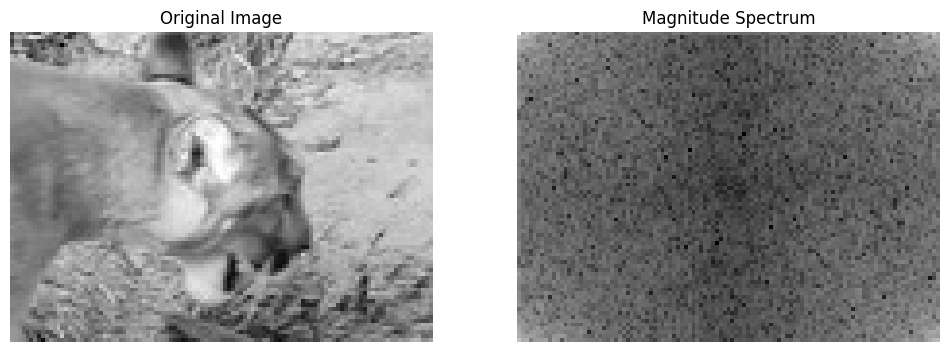

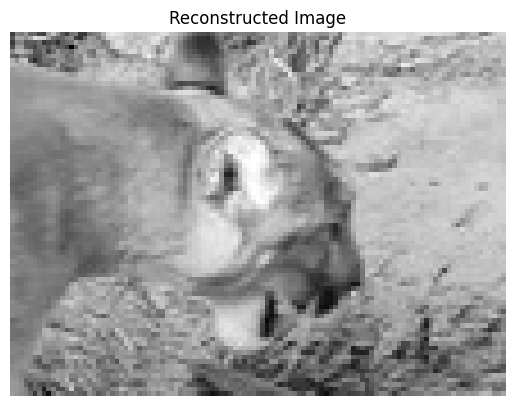

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. 读取图像并转换为灰度图像
img = Image.open('./dataset/secret2.png').convert('L')  # 'L' 表示灰度图像
img_array = np.array(img)

# 2. 对图像进行傅里叶变换
f = np.fft.fft2(img_array)
print("f content: ", f)
print("f shape: ", f.shape)


# 4. 计算频谱的幅度
magnitude_spectrum = np.abs(f)

# 5. 对频谱进行对数缩放，以便更好地显示
magnitude_spectrum = np.log(magnitude_spectrum + 1)  # 加1避免log(0)

# 6. 显示图像和频谱
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


img_back = np.fft.ifft2(f)  # 逆傅里叶变换
img_back = np.abs(img_back)  # 取实部

# 8. 显示恢复的图像
plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
